Task A.3.1: Handwriting Recognition

https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python


> PS. This script is processing-heavy to my local machine, so I had to submit a Colab link instead.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9050
SVM Accuracy: 0.9170
Random Forest Accuracy: 0.9378


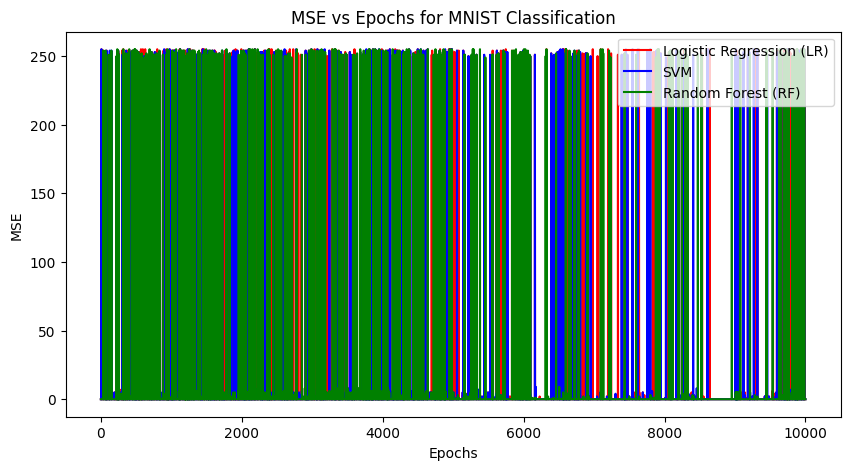

In [1]:
"""
Task A.3.1: Handwriting Recognition
https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python
"""

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Load MNIST dataset from TensorFlow
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Use a smaller subset of the dataset for training and testing
subset_size = 10000  # Adjust this number as needed
X_train, y_train = X_train[:subset_size], y_train[:subset_size]
X_test, y_test = X_test[:subset_size], y_test[:subset_size]

# Flatten images (convert 28x28 pixels to 784 features)
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Normalize to [0,1]
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Initialize classifiers
log_reg = LogisticRegression(max_iter=1000, solver='saga', penalty='l2', multi_class='multinomial')
svm = SVC(kernel='linear')
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_lr = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Compute Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Visualization
plt.figure(figsize=(10, 5))
epochs = np.arange(1, len(y_test) + 1)

plt.plot(epochs, np.abs(y_test - y_pred_lr), label="Logistic Regression (LR)", color='r')
plt.plot(epochs, np.abs(y_test - y_pred_svm), label="SVM", color='b')
plt.plot(epochs, np.abs(y_test - y_pred_rf), label="Random Forest (RF)", color='g')

plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE vs Epochs for MNIST Classification")
plt.legend(loc="upper right")
plt.show()
